<center><h1>Credit Card Anamoly Detection</h1></center>

In [10]:
"C:/Users/yuvanelson/Downloads/model.pkl"

'C:/Users/yuvanelson/Downloads/model.pkl'

## Import Libraries

In [1]:
!pip install numpy


^C


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest


## Load The Dataset

In [13]:
data=pd.read_csv('C:/Users/yuvanelson/Downloads/creditcard.csv/creditcard.csv')

In [14]:
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
# data=data.sample(frac=0.1)

data.shape

(284807, 31)

## Preprocessing the Data

In [16]:
# Checking the missing values in the dataset

data.isnull().any().sum()

0

In [17]:
# Checking the Correlation between features using Correlation Matrix

corr_matrix=data.corr()

print(corr_matrix)

            Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.12

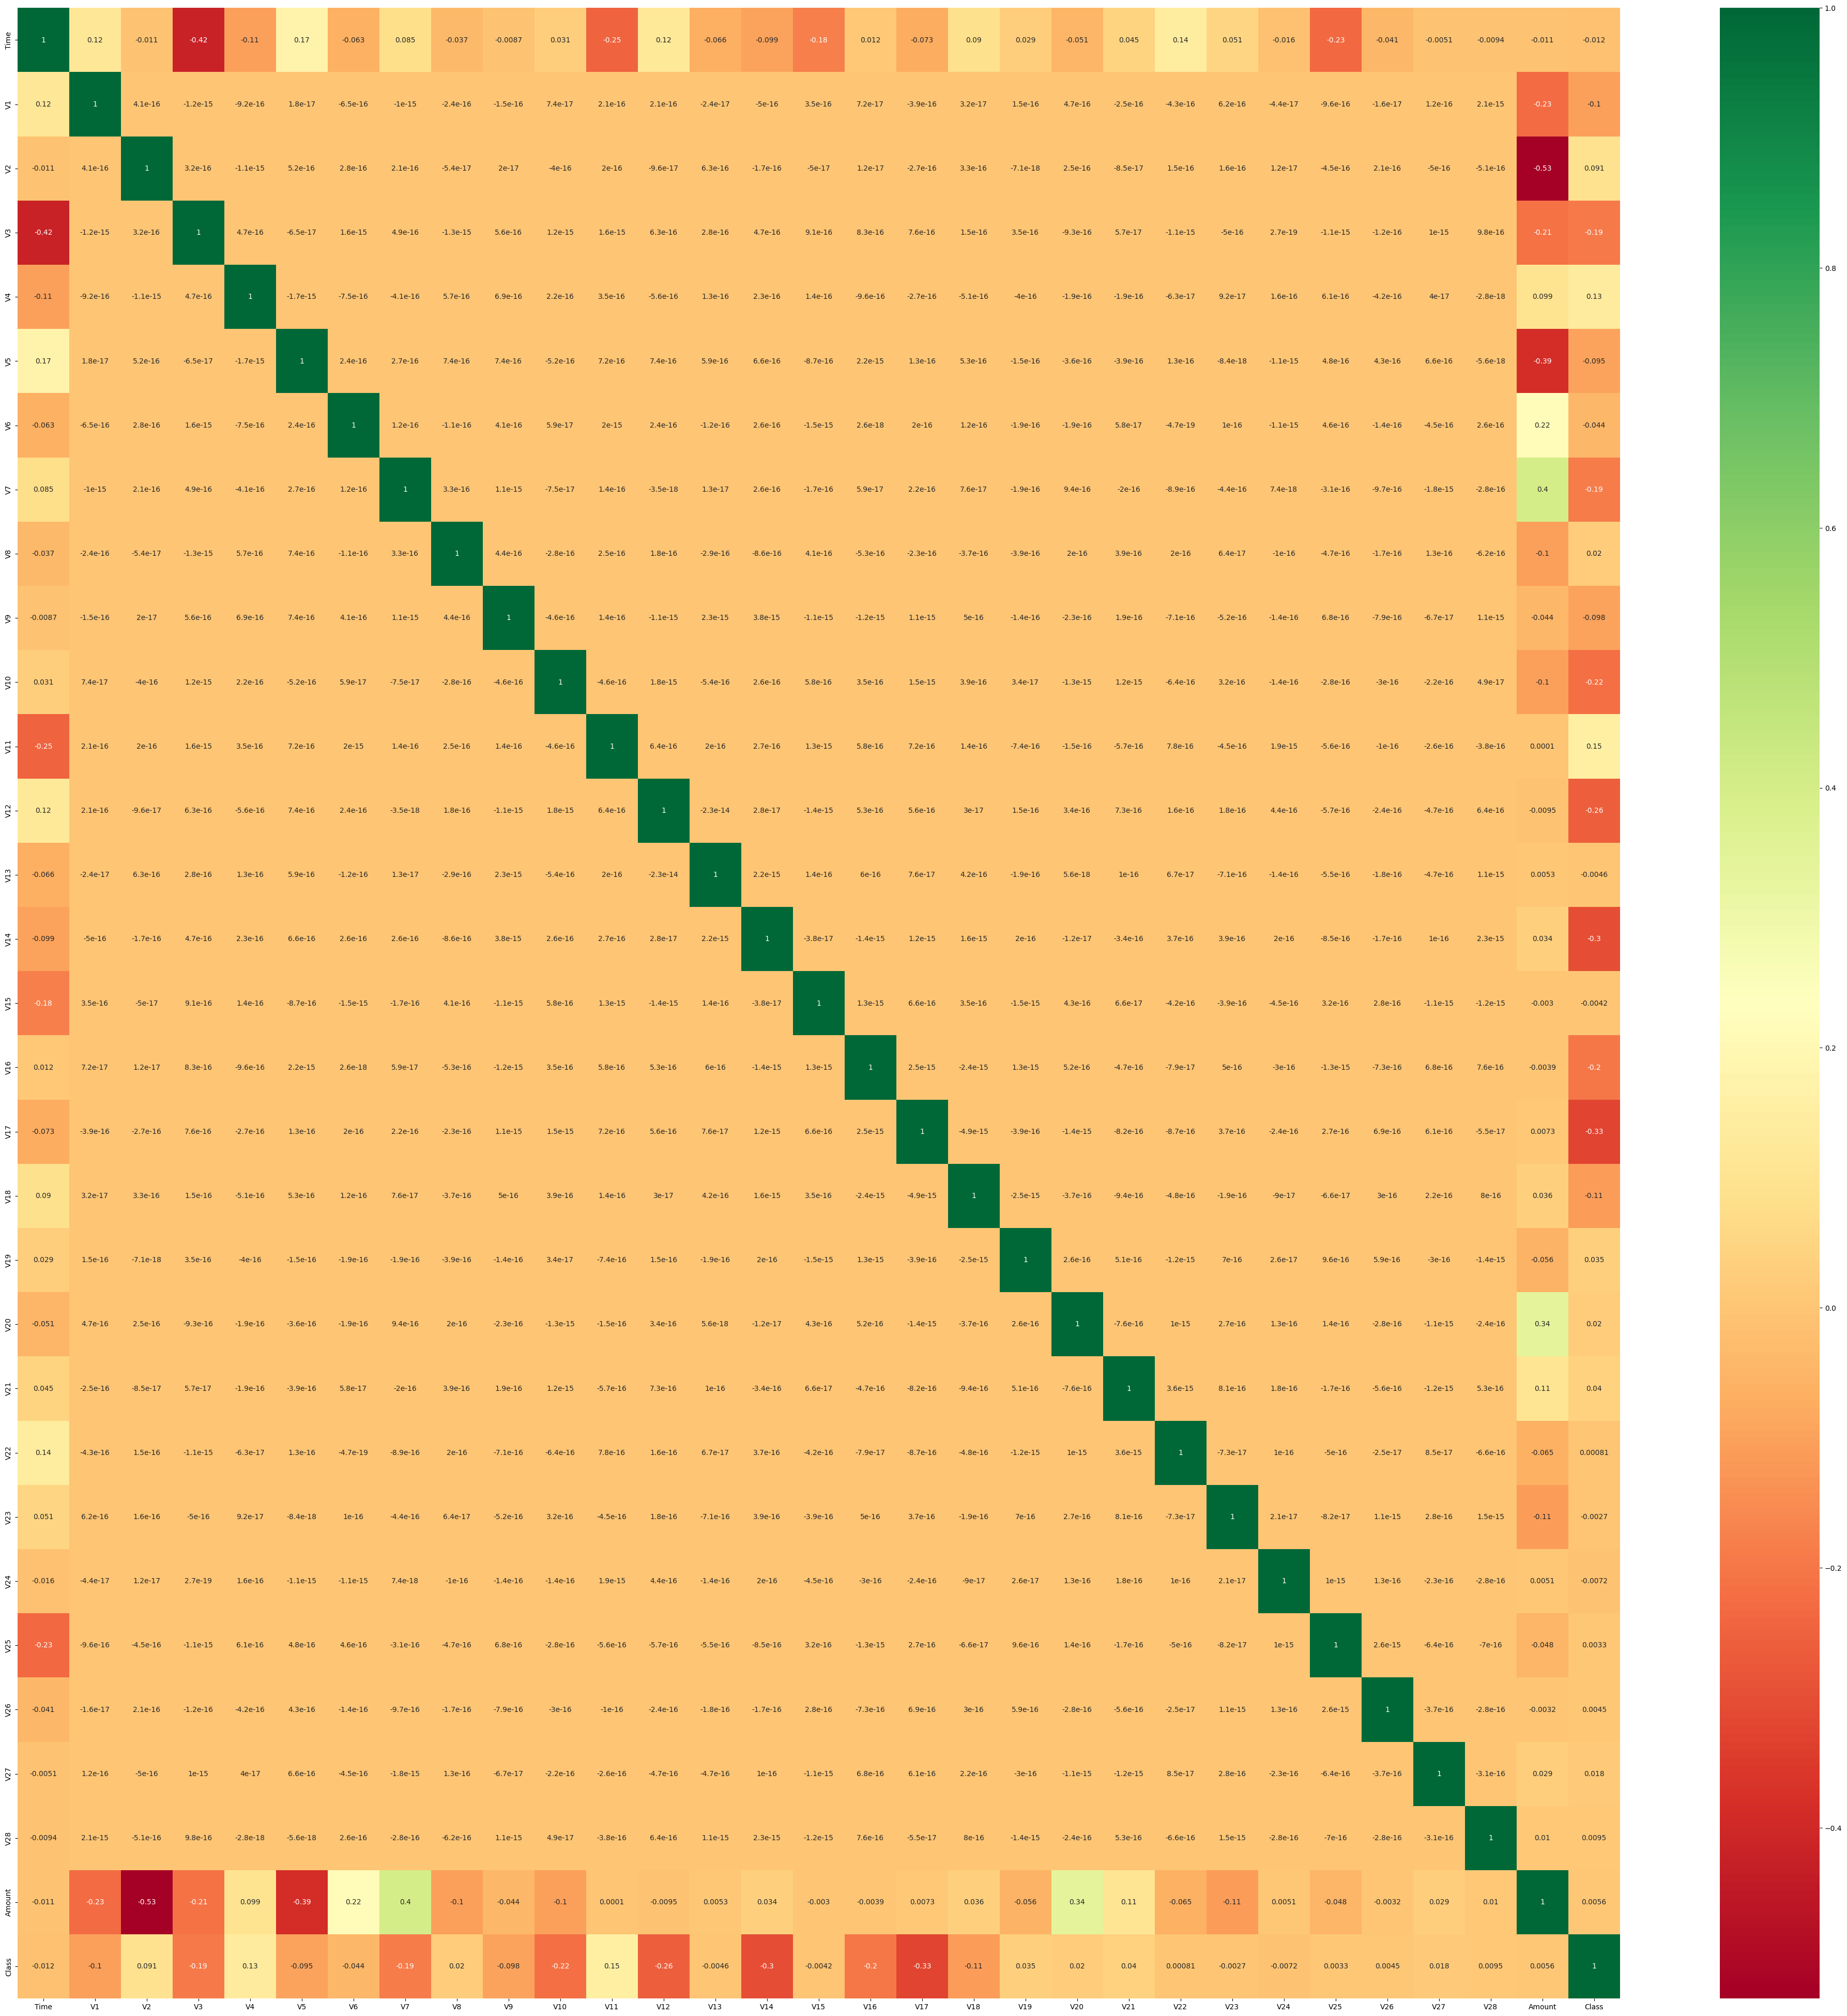

In [20]:
# It is very difficult to check using matrix form so we should go with the Heatmap

plt.figure(figsize=(50,50))

sns.heatmap(corr_matrix,annot=True,cmap="RdYlGn")

plt.show()

In [21]:
# Checking if there are any constant columns

from sklearn.feature_selection import VarianceThreshold

vt=VarianceThreshold(threshold=0.01)

vt.fit_transform(data)

array([[ 0.00000000e+00, -1.35980713e+00, -7.27811733e-02, ...,
         1.33558377e-01, -2.10530535e-02,  1.49620000e+02],
       [ 0.00000000e+00,  1.19185711e+00,  2.66150712e-01, ...,
        -8.98309914e-03,  1.47241692e-02,  2.69000000e+00],
       [ 1.00000000e+00, -1.35835406e+00, -1.34016307e+00, ...,
        -5.53527940e-02, -5.97518406e-02,  3.78660000e+02],
       ...,
       [ 1.72788000e+05,  1.91956501e+00, -3.01253846e-01, ...,
         4.45477214e-03, -2.65608286e-02,  6.78800000e+01],
       [ 1.72788000e+05, -2.40440050e-01,  5.30482513e-01, ...,
         1.08820735e-01,  1.04532821e-01,  1.00000000e+01],
       [ 1.72792000e+05, -5.33412522e-01, -1.89733337e-01, ...,
        -2.41530880e-03,  1.36489143e-02,  2.17000000e+02]])

In [23]:
# constant value columns list 

vt.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False])

<Axes: xlabel='Class', ylabel='count'>

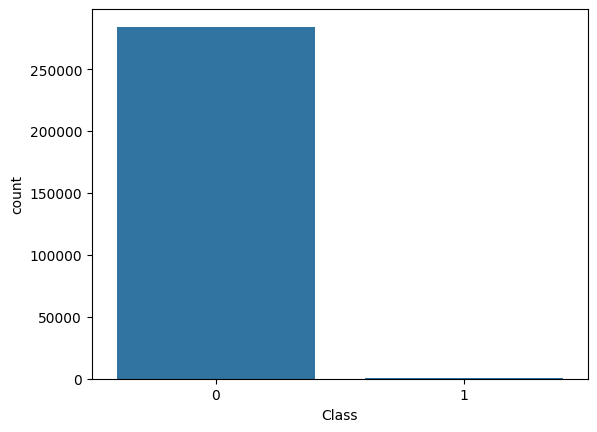

In [24]:
# Counter Plot of Credit Fraud

sns.countplot(data=data,x='Class')

In [25]:
features=data.iloc[:,1:30]

In [26]:
features.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [27]:
labels=data.iloc[:,-1]

In [28]:
labels

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

## Data Splitting

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
label_train,label_test,feature_train,feature_test=train_test_split(labels,features,test_size=0.2,random_state=42)

In [31]:
label_train

223361    0
165061    0
238186    0
150562    0
138452    0
         ..
119879    0
259178    0
131932    0
146867    0
121958    0
Name: Class, Length: 227845, dtype: int64

## Model Training

In [32]:
model=IsolationForest(n_jobs=10)

In [33]:
model.fit(feature_train)

IsolationForest(n_jobs=10)

In [34]:
model.decision_function(feature_train)

array([0.13089693, 0.06636022, 0.14648969, ..., 0.1413761 , 0.04473627,
       0.12943763])

In [35]:
label_pred=model.predict(feature_test)

In [36]:
label_pred

array([-1,  1,  1, ...,  1,  1,  1])

In [37]:
label_pred[label_pred==1]=0
label_pred[label_pred==-1]=1


In [38]:
label_pred

array([1, 0, 0, ..., 0, 0, 0])

## Classification Metrics

In [39]:
import sklearn.metrics as m

In [40]:
m.accuracy_score(label_test,label_pred)

0.9596924265299673

In [41]:
print(m.classification_report(label_test,label_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.03      0.80      0.06        98

    accuracy                           0.96     56962
   macro avg       0.52      0.88      0.52     56962
weighted avg       1.00      0.96      0.98     56962



In [42]:
print(m.confusion_matrix(label_test,label_pred))

[[54588  2276]
 [   20    78]]


## Pickling Model

In [43]:
import pickle

In [44]:
pickle.dump(model,open("creditcard.pkl","wb+"),protocol=pickle.HIGHEST_PROTOCOL)

In [45]:
model=pickle.load(open("creditcard.pkl","rb+"))

In [46]:
model

IsolationForest(n_jobs=10)